Data for this project: 
https://www.kaggle.com/datasets/ninzaami/loan-predication

Import Dependencies

In [ ]:
import numpy as np      #numpy is useful for making numpy arrays
import pandas as pd     #pandas is useful for creating data frames and storing data in them.
import seaborn as sns                                  #Seaborn is used for Data Visualization
from sklearn.model_selection import train_test_split   #for spliting data into train and test data
from sklearn import svm                                #model used in this Project
from sklearn.metrics import accuracy_score             # to find accuracy score of the model


**Data Collection and Preprocessing** 

Data preprocessing transforms the data into a format that is more easily and effectively processed in machine learning tasks. 

In [ ]:
#transferring a dataset to a pandas dataframe to provide easier access to the data
data = pd.read_csv('/content/dataset.csv')

#printing the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns and row present in the data
data.shape

(614, 13)

In [ ]:
#Statistical Measurments
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#find number of missing value in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Since there aren't many missing data points, our prediction won't be much affected. Despite the fact that we have a way to fill in the missing values by moving the mean of that column to the empty space, this data contains text information such as Gender, Married, Education, Self_Employed, etc. It is best to remove these columns because they cannot be filled with numerical values.

In [ ]:
data = data.dropna()

#checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding 
# change YES to 1 and 0 to NO to make data machine Understandable

data.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace=True)

#print the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# As shown above there are four types of values in the Dependents column these are 0, 1, 2, 3+
#We cannot use 3+ as input data so we will replace 3+ to 4 as we done in label encoding 

data = data.replace(to_replace='3+', value=4)

# print them and check
data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

Data Visualization is used to analysing the data and to find relationship between various features or various column of the dataset.
Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations.

<Axes: xlabel='Education', ylabel='count'>

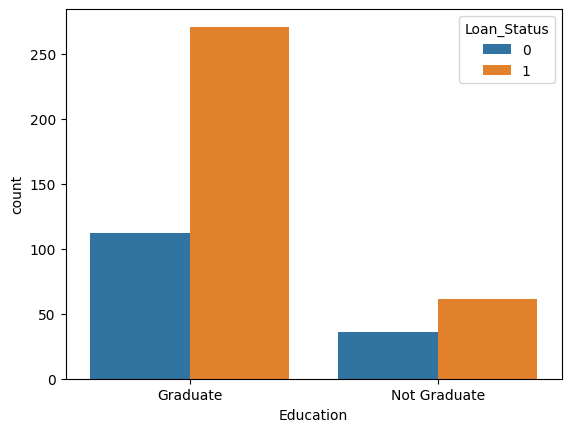

In [ ]:
#Education and loan Status
#We are using countplot function of seaborn library for data visualization 

sns.countplot(x='Education', hue='Loan_Status', data=data)

<Axes: xlabel='Married', ylabel='count'>

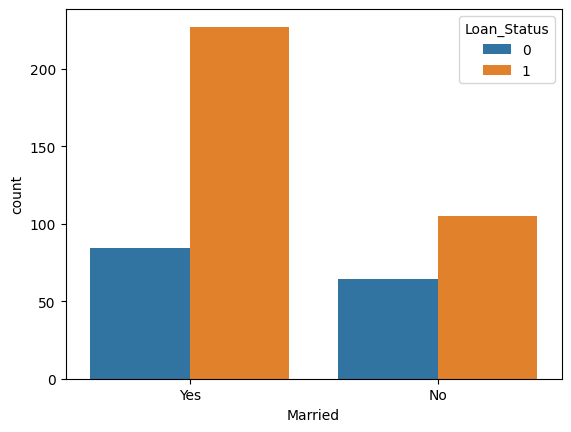

In [ ]:
#Merital Status and Loan status
sns.countplot(x='Married', hue='Loan_Status', data=data)

<Axes: xlabel='Gender', ylabel='count'>

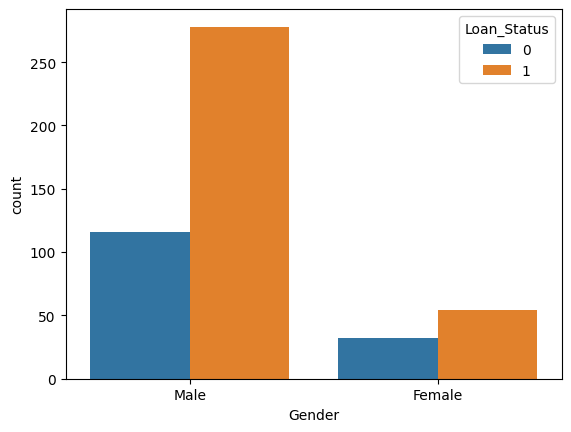

In [ ]:
#Gender and Loan_Status
sns.countplot(x='Gender', hue='Loan_Status', data = data)

In [ ]:
#Change the other column text values to numeric values

#Gender column has value Male and Female
#Married column has value yes and no
#Self_Employed column has value yes and no
#Education column has value Graduate and Non Graduate	
#Property_Area column has value Rural, Semiurban and Urban


data.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0, 'Yes':1}, 
 'Education':{'Graduate':1, 'Not Graduate':0},'Property_Area':{'Rural':0, 'Semiurban':1,'Urban ':2}, 
 'Property_Area': {'Rural':0, 'Semiurban':1,'Urban':2}}, inplace=True)

#print data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


**Separating data and labels**

X: Add all of the Data's features to the X variable. To accomplish this, we must remove the label column from the data and store the remaining columns as X variables. We can remove label column from the data by using the panda's drop function. This function takes the name of the column you wish to remove and the axis. Axis 0 leads to dropping rows, while axis 1 drops columns.

Y: Store label of the data to the variable Y

In [ ]:
#We do not need Loan_Id so here we drop that column for testing data
# axis=1 for droping column axis=0 for droping rows

X = data.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = data['Loan_Status']

print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Splitting Data into Training data and Testing data**

**Train Test Split:** Split arrays or matrices into random train and test subsets.

Spliting data into four variables X_train, X_text, Y_train, Y_test

The X_train variable will hold all of the training data, and the Y_train variable will have the label of the X_tarin data.

Data for evoluation will be store in the X_test label of X_test data will store in the Y_test variable.

---

**test-size:** it defines the ratio of data which divide into traning and testing data.

0.1 = 10% data for testing and rest 90% data for traning

0.2 = 20% data for testing and rest 80% data for traning

---

**Stratify:**  This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.Like in this model we use Stratify = Y as it divide equal 1 and 0 to the train and test data

**Random State:** The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 or 1 or 2, we get the same train and test sets across different executions.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
#printing number of rows and columns of X, X_train and X_test

print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


As spliting is done now train model using Support Vector Machine Algorithm

**Support Vector Machine Algorithm:** Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

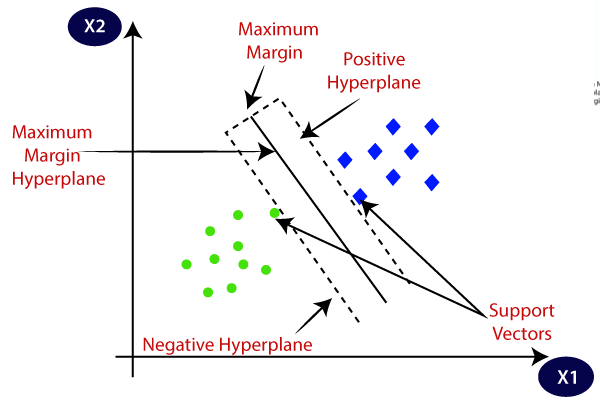

In [ ]:
#Training the Model

#Here we use SVC --> Support Vector Classifier as it is a classification poroblem
classifier = svm.SVC(kernel='linear')

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation:** Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

**Accuracy score:** A function imported from sklearn.metrics. Accuracy score in machine learning is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made. We calculate it by dividing the number of correct predictions by the total number of predictions.

In [ ]:
#Accuracy score between 70 to 80 leads to a good model

#Accuracy score on Traning data

#predict the loan_status in 0 and 1 form
X_train_prediction =  classifier.predict(X_train)

#Now compare it with original label i.e Y_train 
train_accuracy = accuracy_score(X_train_prediction, Y_train)

print('#Accuracy score on Traning data', train_accuracy)

#Accuracy score on Traning data 0.7986111111111112


In [ ]:
#Accuracy score on Test data

#predict the loan_status in 0 and 1 form
X_test_prediction =  classifier.predict(X_test)

#Now compare it with original label i.e Y_test 
test_accuracy = accuracy_score(X_test_prediction, Y_test)

print('#Accuracy score on Test data', test_accuracy)

#Accuracy score on Test data 0.8333333333333334


Model is working very well as it is giving 83% accuracy on test data 